In [28]:
import pandas as pd
import numpy as np

In [29]:
fires = pd.read_csv('C:/Users/DINESH/Desktop/forestfires.csv')
fires = fires.reset_index()
fires.head()

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,small


In [30]:
fires.describe()

,index,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,258.000000,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,149.389312,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,258.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,387.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,516.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
attributes = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']
corr = fires[attributes].corr()
corr

,FFMC,DMC,DC,ISI,temp,RH
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000


array([[<AxesSubplot:xlabel='FFMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='DC', ylabel='FFMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='FFMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DMC'>,
        <AxesSubplot:xlabel='DC', ylabel='DMC'>,
        <AxesSubplot:xlabel='ISI', ylabel='DMC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='DC'>,
        <AxesSubplot:xlabel='DMC', ylabel='DC'>,
        <AxesSubplot:xlabel='DC', ylabel='DC'>,
        <AxesSubplot:xlabel='ISI', ylabel='DC'>],
       [<AxesSubplot:xlabel='FFMC', ylabel='ISI'>,
        <AxesSubplot:xlabel='DMC', ylabel='ISI'>,
        <AxesSubplot:xlabel='DC', ylabel='ISI'>,
        <AxesSubplot:xlabel='ISI', ylabel='ISI'>]], dtype=object)

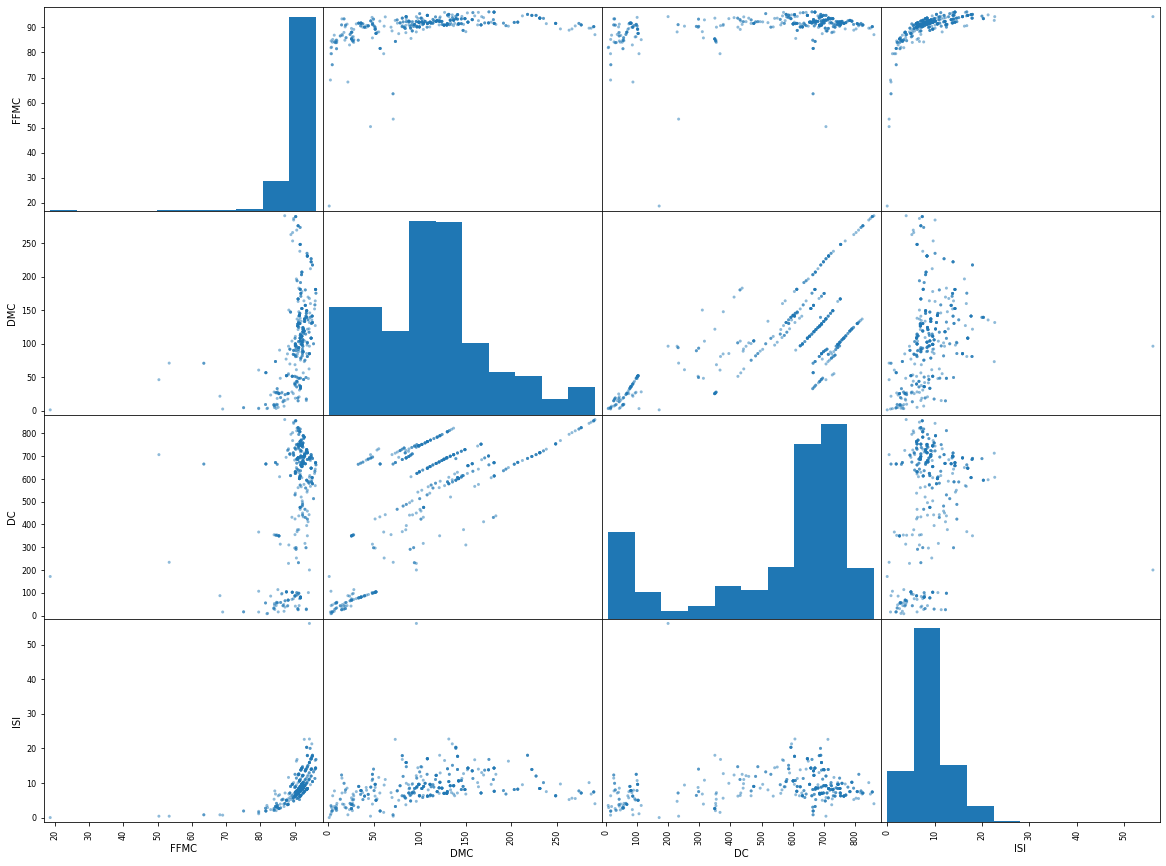

In [32]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = ['FFMC', 'DMC', 'DC', 'ISI']
scatter_matrix(fires[attributes], figsize=(20, 15))

<AxesSubplot:xlabel='DMC', ylabel='DC'>

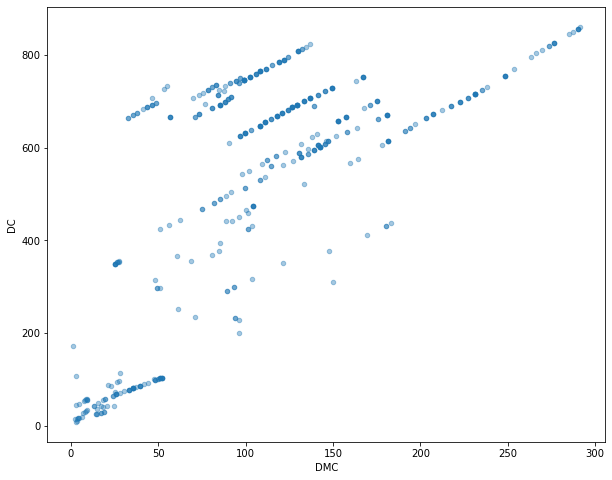

In [33]:
#Ploting the most corelatet attributes
fires.plot(kind="scatter", x="DMC", y="DC", alpha=0.4, figsize=(10,8))

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp',
       'RH', 'wind', 'rain']
X = fires[columns]
Y = fires[['area']].values.ravel()

model = ExtraTreesRegressor(n_estimators=100)
model.fit(X, Y)
cols_to_drop = []

for c in zip(columns,model.feature_importances_.round(4)):
    if c[1] <0.01:
        cols_to_drop.append(c[0])
print('Columns to be droped: ',cols_to_drop)
# attribute rain is droped because we doesn't get enough informatin
fires = fires.drop(cols_to_drop,axis=1)

Columns to be droped:  ['rain']


In [35]:
corr_matrix = fires.corr()
corr_matrix["area"].sort_values(ascending=False)

area        1.000000
temp        0.097844
daysat      0.087868
index       0.077550
DMC         0.072994
monthsep    0.056573
DC          0.049383
FFMC        0.040122
daythu      0.020121
wind        0.012317
ISI         0.008258
monthmay    0.006264
monthjul    0.006149
monthdec    0.001010
daytue     -0.001333
monthaug   -0.004187
monthapr   -0.008280
monthnov   -0.008893
daywed     -0.011452
monthjan   -0.012589
monthoct   -0.016878
monthjun   -0.020314
daysun     -0.020463
monthfeb   -0.020732
daymon     -0.021206
monthmar   -0.045596
dayfri     -0.052911
RH         -0.075519
Name: area, dtype: float64

In [36]:
# attribute DC is also droped because it's corelated with DMC
fires.drop(labels=['DC'],axis=1,inplace=True)

In [37]:
# fancy plot for FFMC and DMC
import plotly.express as px 
df_long=pd.melt(fires,id_vars=['index'], value_vars=['FFMC', 'DMC']) 
fig = px.line(df_long, x='index', y='value', color='variable')
fig.show()

In [38]:
# another fancy plot for ISI, temp and wind
import plotly.express as px 
df_long=pd.melt(fires,id_vars=['index'], value_vars=['ISI',	'temp',	'wind']) 
fig = px.line(df_long, x='index', y='value', color='variable')
fig.show()

In [39]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

#droping outliers
attributes = ['FFMC', 'DMC', 'ISI']
outliers_to_drop = []
for tmp in attributes:
    df_anomaly = fires.copy()
    clustering1 = DBSCAN(eps=2.5, min_samples=2).fit(np.array(df_anomaly[tmp]).reshape(-1,1))
    labels = clustering1.labels_
    outlier_pos = np.where(labels == -1)[0]

    outliers_to_drop += list(outlier_pos)

outliers_to_drop = np.unique(outliers_to_drop)
print(outliers_to_drop)

fires.drop(labels=outliers_to_drop,axis=0,inplace=True)

[ 22 299 312 379 405 422 434 437 451 452 453]


In [40]:
fires_cat = fires[['month', 'day']]
fires_num = fires[[ 'FFMC', 'DMC', 'ISI', 'temp', 'RH','wind']]
target = fires[['area']]

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

fires_num_tr = num_pipeline.fit_transform(fires_num)

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
days = fires_cat[['day']].values
days_encoded = ordinal_encoder.fit_transform(days)
fires_cat['day'] = days_encoded.astype(np.int8)

ordinal_encoder = OrdinalEncoder()
months = fires_cat[['month']].values
months_encoded = ordinal_encoder.fit_transform(months)
fires_cat['month'] = months_encoded.astype(np.int8)

<ipython-input-42-0eda5520371a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-0eda5520371a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
from sklearn.model_selection import train_test_split

data = np.concatenate((fires_num_tr,fires_cat),axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target.values, test_size=0.33, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

print(data.shape)

(506, 8)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['rbf', 'sigmoid'], 'C': [1,50, 100 ,300],
     'epsilon': [0.2, 0.2,0.1]},
  ]

svr_cv =SVR()
svr_grid_search = GridSearchCV(svr_cv, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
svr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 50, 100, 300], 'epsilon': [0.2, 0.2, 0.1],
                          'kernel': ['rbf', 'sigmoid']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
svr_grid_search.best_estimator_

SVR(C=300, epsilon=0.2)

In [46]:
final_model = svr_grid_search.best_estimator_
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print('SMSE: ',final_rmse)
print('MAE: {}'.format(mean_absolute_error(y_test, final_predictions)))

SMSE:  30.007267029199692
MAE: 9.361630725115939


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False,True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
rfr_grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
rfr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False, True], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
final_model = rfr_grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print('MSE: ',final_rmse)
print('MAE: {}'.format(mean_absolute_error(y_test, final_predictions)))

MSE:  44.44233286624803
MAE: 19.25289863130881
